## Products Data 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
#%matplotlib notebook

Observations

 

In [20]:

#Find the files
#productsdata_path = "..\productsdata\ProductsData.csv"


# Read the mouse data and the study results
productsdata_df = pd.read_csv("ProductsData.csv")
#study_results_df = pd.read_csv(study_results_path) for second file to read in 

# Merge datasets
#mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

productsdata_df.head()

# Mpouse Study Preview 


FileNotFoundError: [Errno 2] File ProductsData.csv does not exist: 'ProductsData.csv'

In [141]:
#Total Number of Mice
Total_Mice = len(mouse_study_df["Mouse ID"].unique())
Total_Mice_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_df

,Number of Mice
0,249


In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Find duplicates 

mouse_study_df[mouse_study_df.duplicated(keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [143]:
#drop the duplicate mouse

mouse_study_clean_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [145]:
# Checking the number of mice in the clean DataFrame.
Total_Mice = len(mouse_study_clean_df["Mouse ID"].unique())
Total_Mice_Clean_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_Clean_df

,Number of Mice
0,248


## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Summary Stats - long version 
Mean = mouse_study_clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median = mouse_study_clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
varience = mouse_study_clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
Std_dev = mouse_study_clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem = mouse_study_clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
Summary_Stats_df = pd.DataFrame({
            "Mean" : Mean, 
            "Median": median, 
            "Variance": varience ,
            "Standard Deviation": Std_dev,
            "SEM ": sem
})
Summary_Stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby to get aggs

mouse_study_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" :['mean','median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

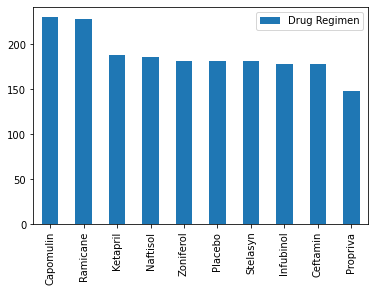

In [174]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

plot_mice_df = pd.DataFrame(mouse_study_clean_df["Drug Regimen"].value_counts()) 
plot_mice_df.plot(kind = "bar")

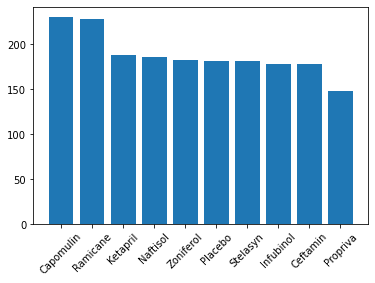

In [176]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = mouse_study_clean_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xticks(rotation = 45)
plt.show()

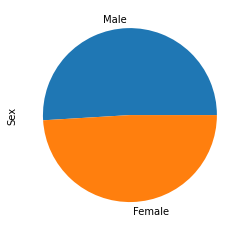

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_mice_df = mouse_study_clean_df["Sex"].value_counts()
plot_mice_df.plot(kind = "pie")


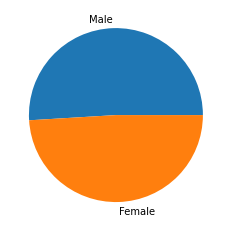

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_study_clean_df["Sex"].value_counts()
plt.pie(counts.values,labels=counts.index.values)
plt.show()


## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Drugs = mouse_study_clean_df.loc[(mouse_study_clean_df["Drug Regimen"] == "Capomulin") |
                                 (mouse_study_clean_df["Drug Regimen"] == "Ramicane") |
                                 (mouse_study_clean_df["Drug Regimen"] == "Infubinol") |
                                 (mouse_study_clean_df["Drug Regimen"] == "Ceftamin") ]

#Final timepoint
Final_tp = Drugs.groupby("Mouse ID").max()["Timepoint"]
Tumor_Vol = pd.merge(Final_tp,Drugs, how = "outer", on = "Mouse ID")


# Final tumor volume

Tumor_Vol
final_vol = Tumor_Vol.loc[Tumor_Vol["Timepoint_y"]== Tumor_Vol["Timepoint_x"]]
final_vol

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
773,y769,45,Ceftamin,Female,6,27,45,68.594745,4
783,y793,45,Capomulin,Male,17,17,45,31.896238,2
793,y865,45,Ceftamin,Male,23,26,45,64.729837,3
803,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [155]:
# Put treatments into a list for for loop (and later for plot labels)

# List for loop
sort_drug = final_vol["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting) and get the 4 
#Tumor Volume
tumor_vol = []

for drug in sort_drug:
    final_4 = final_vol["Tumor Volume (mm3)"].loc[final_vol["Drug Regimen"] == drug]
    tumor_vol.append(final_4)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#loop in merged df where DR contain drug in treatment list (one of the 4) - pull tumor vol

    quantiles = final_4.quantile([0.25,0.5,0.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq-lowerq
print(f"The lower quartile of tumor size is: {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quantiles[0.5]} ")
# Lower and upper bounds 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor size is: 32.37735684
The upper quartile of tumor size is: 40.1592203
The interquartile range of tumor size is: 7.781863460000004
The the median of tumor size is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


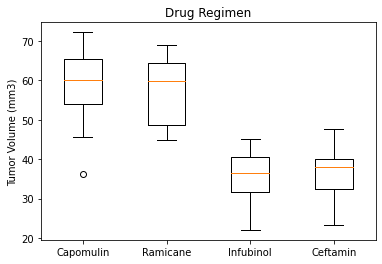

In [194]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
#Note - one outlier 


## Line and Scatter Plots

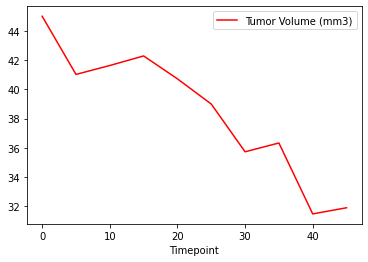

In [184]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Break ouf Capomulin
Capomulin = mouse_study_clean_df.loc[mouse_study_clean_df["Mouse ID"] == 'y793']
Capomulin

line_plot_df = Capomulin
line_plot_df

line_plot_final = line_plot_df[["Timepoint", "Tumor Volume (mm3)"]]
line_plot_final
Capomulin.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',color='red')
# Create Time ppoint graph


In [158]:
#Get results only for Capomulin
Capomulin_Wei_ATV = mouse_study_clean_df.loc[mouse_study_clean_df['Drug Regimen'] == "Capomulin"]
Capomulin_Wei_ATV.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


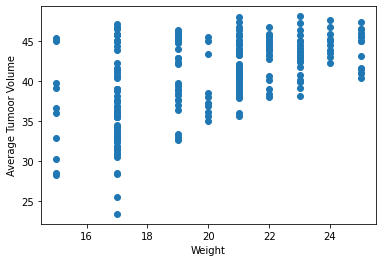

In [159]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_values = Capomulin_Wei_ATV ['Weight (g)']
y_values = Capomulin_Wei_ATV ['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight')
plt.ylabel('Average Tumoor Volume')
plt.show()


## Correlation and Regression

R value is 0.5256995552077166
Slope is 0.9609669432428346


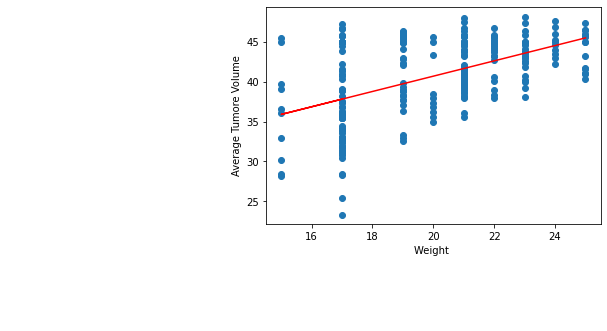

In [193]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Regression dependency imported at top 
x_values = Capomulin_Wei_ATV['Weight (g)']
y_values = Capomulin_Wei_ATV['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight ')
plt.ylabel('Average Tumore Volume')
Capomulin_Wei_ATV.corr()

x_values.corr(y_values)

#plt.corr

print("R value is " + str(rvalue))
print("Slope is " + str(slope))
plt.show()

In [190]:
Capomulin_Wei_ATV.corr()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,-0.169172,-0.057964,-0.021604,0.006748
Weight (g),-0.169172,1.000000,-0.035271,0.525700,-0.119149
Timepoint,-0.057964,-0.035271,1.000000,-0.584271,0.584006
Tumor Volume (mm3),-0.021604,0.525700,-0.584271,1.000000,-0.313092
Metastatic Sites,0.006748,-0.119149,0.584006,-0.313092,1.000000
